# HW 2 - Linear Model, Logistic Regression and Classification

Complete the following questions and resubmit this entire notebook to canvas.
- For questions that ask you to derive or find a quantity use a __text cell__ to show your calculations.
 - Use markdown to write math expressions (as was done to create these problems) and make sure to show your work.
 - It doesnt have to be perfect looking but it needs to be readible.
 - You may also submit a legible picture of your derivation
- For questions that ask you compute something or write code use a __code cell__ to write your code.
 - You can create additional code cells as needed.
 - Just make sure your code is commented, the functions are named appropriately, and its easy to see your final answer.

__SUBMISSION__

When you submit you will submit a pdf file __and__ the notebook file. The TA will use the pdf file to grade more quickly. The notebook file is there to confirm your work.

To generate a pdf file
1. Click File
2. Click print
3. Set the destinationas "save as pdf"
4. Hit print

Title the pdf file `LASTNAME-FIRSTNAME-HW2.pdf`
Title your notebook file as `LASTNAME-FIRSTNAME-HW2.ipynb`

Submit both files.

Do not actually print your notebook out!



In [1]:
# libraries and functions you may find useful
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from sklearn.model_selection import train_test_split
from tqdm.notebook import trange

## Q1 - Linear Model

Let
- $X_{n \times p}$ be a data matrix with $n$ observations and $p$ features
- $Y_{n \times 1}$ be a response matrix with $n$ observations and 1 outcomes
- $\beta_{p \times 1}$ be an unknown $p$ dimensional __slope__ vector

We assume a linear model to predict Y using X
- $Y = X \beta + \epsilon$
- $\epsilon \sim N(0, \sigma^2 I_n)$

### part 1 - Gradient Descent

We will use the following loss function:
$$L(\beta) = (Y - X\beta)^T(Y - X\beta)$$

Show that the gradient of $\ell(\beta)$ with respect to $\beta$ is
$$\nabla \ell(\beta) = -2X^T(Y - X\beta)$$



Answer: $x_i$ is the row vector.
$$
Δ\ell(\beta) = Δ\sum_{i=1}^n(y_i - x_i\beta)^2\\
=\sum_{i=1}^n(y_i - x_i\beta) (2)(-x_i^T)\\
=\sum_{i=1}^n-2x_i^T(y_i - x_i\beta)\\
=-2X^T(Y - X\beta)
$$

### part 2 - Exact solution

We want to minimize $L(\beta)$ so we find the point $\hat \beta$ where $\nabla L(\hat \beta) = 0$.

Set
$$\nabla L(\beta) = 0$$
to show that
$$
\hat \beta = (X^TX)^{-1}X^TY
$$

Answer:
$$\nabla \ell(\hat{\beta}) = -2X^T(Y - X\hat{\beta}) = 0\\
X^TY - X^TX\hat{\beta} = 0\\
X^TY = X^TX\hat{\beta}\\
\hat \beta = (X^TX)^{-1}X^TY
$$

### part 3 - Application

Now, we're going to estimate $\beta$ in two ways. One with gradient descent and one with the exact method.

We will use the `diabetes` dataset from sklearn to test our method. The code below will load this dataset and store the features in a matrix called `x` and the targets in a vector called `y`. Then we will split the data further into training and testing.

First, lets write two functions in python

1. Write a function called `loss_grad()` that takes a covariate matrix $X$, target vector $Y$, and a parameter vector $\beta$ and computes $\nabla \ell(\beta)$ `Use the gradient that you derived in previous question`

2. Write a function called `exact_beta_hat()` that takes a covariate matrix $X$ and target vector $Y$ and computes the exact solution.


Now we will fit a linear model in two ways.

1. Gradient descent. Write a gradient descent loop with your `loss_grad()` function to estimate $\beta$ with `x_train` and `y_train` (don't forget to choose an appropriate $\gamma$). Store this in a variable called `beta_gd`

2. The exact method. Compute the exact estimate $\hat \beta$ with your function `exact_beta_hat()` on `x_train` and `y_train`and store the output in a variabled called `beta_exact`

Compare `beta_gd` and `beta_exact`. Compare the MSE of each of your fitted models on the test data.

In [2]:
from sklearn import datasets
x, y = datasets.load_diabetes(return_X_y = True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [3]:
# helper functions - loss_grad(), exact_beta_hat()
def loss_grad(x, y, beta):
  return -2 * np.matmul(np.transpose(x), (y - np.matmul(x, beta))) #=-2X^T(Y - X\beta)

def exact_beta_hat(x, y):
  return np.matmul(np.linalg.inv(np.matmul(np.transpose(x), x)), np.matmul(np.transpose(x), y))#(X^TX)^{-1}X^TY)

In [4]:
import torch
import numpy as np
# gradient descent and exact soln
# gradient descent
beta_gd = np.array([1] * 10)

# loop to compute the sequence of updates
for i in range(1000):
  grad = loss_grad(x_train, y_train, beta_gd)

  beta_gd = beta_gd - .1 * grad


#beta_exact
beta_exact = exact_beta_hat(x_train, y_train)

In [5]:
# compare beta_gd and beta_exact
print("The final gradient descent beta value is (beta_gd) = (", beta_gd, ").")
print("The beta_exact value is = (", beta_exact, ").")
print("The difference in values: ", beta_gd - beta_exact)

The final gradient descent beta value is (beta_gd) = ( [  80.75205735 -221.6607781   689.3987271   394.18206732 -174.12326521
  -39.03237656 -143.40482566   66.66569063  427.09494213   85.44627669] ).
The beta_exact value is = ( [  80.34069697 -221.95087994  688.30549181  394.54972402 -218.85751126
   -4.14736716 -123.42759485   73.23757513  444.35433862   85.18445811] ).
The difference in values:  [  0.41136038   0.29010184   1.09323529  -0.3676567   44.73424604
 -34.8850094  -19.97723081  -6.5718845  -17.25939649   0.26181858]


In [6]:
# compare test loss

mse_gd = (np.square(y_test - np.matmul(x_test, beta_gd))).mean()
print("The test loss for the gradient descent beta value is: ", mse_gd)
mse_exact = (np.square(y_test - np.matmul(x_test, beta_exact))).mean()
print("The test loss for the exact beta value is: ", mse_exact)

The test loss for the gradient descent beta value is:  27377.30617309654
The test loss for the exact beta value is:  27369.627449405285


### part 4 - Loss function

What if we had assumed $\epsilon_i \sim Laplace(0, \sigma)$? i.e
$$
\mathcal{L}(\beta \mid \{(x_i y_i)\}_{i = 1}^n) = \prod_{i =1}^n \frac{1}{2 \sigma} \exp \left(-\frac{|y_i - x_i \beta|}{\sigma} \right)
$$

Derive the following loss function from the likelihood,
$$\sum_{i=1}^n |y_i - x_i \beta|.$$
Show that maximizing the likelihood is equivelant as minimizing the loss function.



## Q2 - Classification

In class we used sigmoids and logits to change between probabilities (values on $(0, 1)$) and unbounded values. But this isnt the only option. There are many functions that can map between the two. Another function that does this is

$$g(x) = (\tanh(x) + 1)/2$$

where the hyperbolic tangent function is defined as
$$\tanh(x) = \frac{\exp(x) - \exp(-x)}{\exp(x) + \exp(-x)}$$

Lets re-implement logistic regression with a hyperbolic tangent non-linearity.


### part 1 - Implement the model

Create a pytorch compatible class called ``LogisticRegressionTanh()`` that is exactly the same as ordinary logistic regression except that the sigmoid is replaced with ``g()``. You may use pytorches built in ``torch.nn.tanh()`` function.

Replace the `pass` statements with your own code

In [7]:
import torch
import torch.nn as nn

def g(z):
  return (torch.tanh(z)+1.)/2.

class LogisticRegressionTanh(nn.Module):
  def __init__(self, x, y):
    super(LogisticRegressionTanh, self).__init__()
    self.weight = torch.zeros((x.shape[1], 1)).double()
    self.bias = torch.zeros(1).double()

    self.weight.requires_grad_()
    self.bias.requires_grad_()

  def forward(self, x):
    t = x @ self.weight + self.bias
    return g(t)

In [8]:
g(torch.tensor(-9))

tensor(2.9802e-08)

### part 2 - Comparing with ordinary logistic regression

Using the breast cancer dataset (loaded below)

1. What loss function should we use now that we have a ``tanh()`` nonlinearity instead of a ``sigmoid()`` nonlinearity?

1. Write a gradient descent algorithm to find the optimal parameters of ``LogisticRegressionTanh()`` on the training data using an appropriate loss function

2. Do the same for a standard logistic regression (sigmoid non-linearity) on the training data

3. Compare the __accuracy__, __AUC__, __Brier Score__, and the sensitivity, specificity, and F1 score using a cutoff of $p > 0.5$, of each method on the test data

In [9]:
from sklearn import datasets
cancer = datasets.load_breast_cancer(as_frame=True)
x, y = cancer.data, cancer.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

x_train = torch.tensor(np.array(x_train))
y_train = torch.tensor(np.array(y_train)).reshape(-1, 1)
x_test = torch.tensor(np.array(x_test))
y_test = torch.tensor(np.array(y_test)).reshape(-1, 1)

In [10]:
# your code here
def bce_loss(model, x, y):
  p = model(x)
  return -torch.mean(y*torch.log(p) + (1-y)*torch.log(1-p))

### scale inputs
x_mean = torch.mean(x_train, axis = 0)
x_sd = torch.std(x_train, axis = 0)

x_train = (x_train - x_mean[None,:]) / x_sd[None,:]
x_test = (x_test - x_mean[None,:]) / x_sd[None,:]

In [11]:
lr = LogisticRegressionTanh(x, y)

In [12]:
n_epoch = 10000

lr = LogisticRegressionTanh(x, y)

loss_trace = np.zeros(n_epoch)
loss_test_trace = np.zeros(n_epoch)

for i in trange(n_epoch):

  # forward pass: evaluate the function
  loss = bce_loss(lr, x_train, y_train)
  loss_trace[i] = loss

  # backward pass: compute derivatives
  loss.backward()

  loss_test = bce_loss(lr, x_test, y_test)
  loss_test_trace[i] = loss_test

  # update parameter
  lr.weight.data = lr.weight.data - 1e-3 * lr.weight.grad
  lr.bias.data = lr.bias.data - 1e-3 * lr.bias.grad

  # clear out gradients (pytorch automatically accumulates gradients each iter)
  lr.weight.grad.zero_()
  lr.bias.grad.zero_()

  0%|          | 0/10000 [00:00<?, ?it/s]

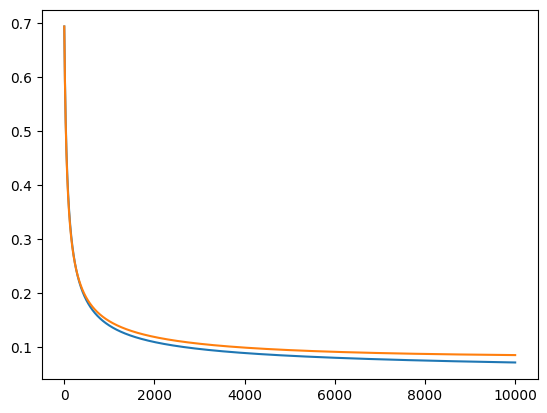

In [13]:
import matplotlib.pyplot as plt

plt.plot(loss_trace)
plt.plot(loss_test_trace)

In [14]:
class LogisticRegressionSigmoid(nn.Module):
  def __init__(self, x, y):
    super(LogisticRegressionSigmoid, self).__init__()
    self.weight = torch.zeros((x.shape[1], 1)).double()
    self.bias = torch.zeros(1).double()

    self.weight.requires_grad_()
    self.bias.requires_grad_()

  def forward(self, x):
    t = x @ self.weight + self.bias
    return torch.sigmoid(t)

In [15]:
n_epoch = 10000

lrs = LogisticRegressionSigmoid(x, y)

loss_trace = np.zeros(n_epoch)
loss_test_trace = np.zeros(n_epoch)

for i in trange(n_epoch):

  # forward pass: evaluate the function
  loss = bce_loss(lrs, x_train, y_train)
  loss_trace[i] = loss

  # backward pass: compute derivatives
  loss.backward()

  loss_test = bce_loss(lrs, x_test, y_test)
  loss_test_trace[i] = loss_test

  # update parameter
  lrs.weight.data = lrs.weight.data - 1e-3 * lrs.weight.grad
  lrs.bias.data = lrs.bias.data - 1e-3 * lrs.bias.grad

  # clear out gradients (pytorch automatically accumulates gradients each iter)
  lrs.weight.grad.zero_()
  lrs.bias.grad.zero_()

  0%|          | 0/10000 [00:00<?, ?it/s]

In [16]:
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, brier_score_loss, accuracy_score
def evaluate_model(model, x, y):
    with torch.no_grad():
        p = model(x).numpy().flatten()
        y_pred = (p > 0.5).astype(int)
        y_true = y.numpy().flatten()

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'auc': roc_auc_score(y_true, p),
        'brier': brier_score_loss(y_true, p),
        'sensitivity': tp / (tp + fn) if (tp + fn) != 0 else 0,
        'specificity': tn / (tn + fp) if (tn + fp) != 0 else 0,
        'f1': f1_score(y_true, y_pred)
    }

In [17]:
print(evaluate_model(lr, x_test, y_test))
print(evaluate_model(lrs, x_test, y_test))

{'accuracy': 0.958041958041958, 'auc': np.float64(0.9955974842767296), 'brier': np.float64(0.025050082931558873), 'sensitivity': np.float64(0.9777777777777777), 'specificity': np.float64(0.9245283018867925), 'f1': 0.967032967032967}
{'accuracy': 0.958041958041958, 'auc': np.float64(0.9955974842767296), 'brier': np.float64(0.03038562923601175), 'sensitivity': np.float64(0.9777777777777777), 'specificity': np.float64(0.9245283018867925), 'f1': 0.967032967032967}


## Q3 - Class imbalance

Download the climate simulation crash dataset from the following link
- https://archive.ics.uci.edu/ml/datasets/Climate+Model+Simulation+Crashes

Linux, OSX, and collab users can use the following shell command to autodownload it.



In [18]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00252/pop_failures.dat

--2025-03-21 06:59:00--  https://archive.ics.uci.edu/ml/machine-learning-databases/00252/pop_failures.dat
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘pop_failures.dat’

pop_failures.dat        [   <=>              ] 244.26K   421KB/s    in 0.6s    

2025-03-21 06:59:01 (421 KB/s) - ‘pop_failures.dat’ saved [250119]



In [19]:
import pandas as pd
climate = pd.read_csv('pop_failures.dat', sep="\s+")
print(climate.columns)

Index(['Study', 'Run', 'vconst_corr', 'vconst_2', 'vconst_3', 'vconst_4',
       'vconst_5', 'vconst_7', 'ah_corr', 'ah_bolus', 'slm_corr',
       'efficiency_factor', 'tidal_mix_max', 'vertical_decay_scale',
       'convect_corr', 'bckgrnd_vdc1', 'bckgrnd_vdc_ban', 'bckgrnd_vdc_eq',
       'bckgrnd_vdc_psim', 'Prandtl', 'outcome'],
      dtype='object')


### part 1 - Training

Your task is to predict the last column `'outcome'` using the other columns except `'Study'` and `'Run'`. As always we will evaluate everything on test.
 - note: `'outcome'` records __failures as 0__. You need to swap the 0s to 1s and the 1s to 0s before proceeding because we want to predict failure.

1. Split the data into train/validation/test. You may use functions from sklearn. Hint: Split into train/test then further split train into train/val.

2. Write your own logistic regression model and fit it with your gradient descent loop on the climate dataset.

3. Keep track of your loss on train __and__ your loss on the validation set and plot each loss trace. Compare the two loss traces and state whether there is any evidence of overfitting or not. (Do not call backward on your validation loss)

In [20]:
import torch
import torch.nn as nn

class LogisticRegression(nn.Module):
  def __init__(self, x, y):
    super(LogisticRegression, self).__init__()
    self.weight = torch.zeros((x.shape[1], 1)).double()
    self.bias = torch.zeros(1).double()

    self.weight.requires_grad_()
    self.bias.requires_grad_()

  def forward(self, x):
    t = x @ self.weight + self.bias
    return torch.sigmoid(t)

def bce_loss(model, x, y):
  p = model(x)
  return -torch.mean(y*torch.log(p) + (1-y)*torch.log(1-p))

In [21]:
y = climate[['outcome']]
y = 1.0*(y == 0)
x = climate.drop(['Study', 'Run', 'outcome'], axis = 1)

In [22]:
import numpy as np
x = torch.tensor(np.array(x))
y = torch.tensor(np.array(y)).reshape(-1, 1)

In [23]:
from tqdm.notebook import trange
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

x_train = torch.tensor(np.array(x_train))
y_train = torch.tensor(np.array(y_train)).reshape(-1, 1)
x_test = torch.tensor(np.array(x_test))
y_test = torch.tensor(np.array(y_test)).reshape(-1, 1)

### scale inputs
x_mean = torch.mean(x_train, axis = 0)
x_sd = torch.std(x_train, axis = 0)

x_train = (x_train - x_mean[None,:]) / x_sd[None,:]
x_test = (x_test - x_mean[None,:]) / x_sd[None,:]

In [24]:
climate.shape
x_train.shape

torch.Size([405, 18])

In [25]:
n_epoch = 10000

lr = LogisticRegression(x, y)

loss_trace = np.zeros(n_epoch)
loss_test_trace = np.zeros(n_epoch)

for i in trange(n_epoch):

  # forward pass: evaluate the function
  loss = bce_loss(lr, x_train, y_train)
  loss_trace[i] = loss

  # backward pass: compute derivatives
  loss.backward()

  loss_test = bce_loss(lr, x_test, y_test)
  loss_test_trace[i] = loss_test

  # update parameter
  lr.weight.data = lr.weight.data - 1e-1 * lr.weight.grad
  lr.bias.data = lr.bias.data - 1e-1 * lr.bias.grad

  # clear out gradients (pytorch automatically accumulates gradients each iter)
  lr.weight.grad.zero_()
  lr.bias.grad.zero_()

  0%|          | 0/10000 [00:00<?, ?it/s]

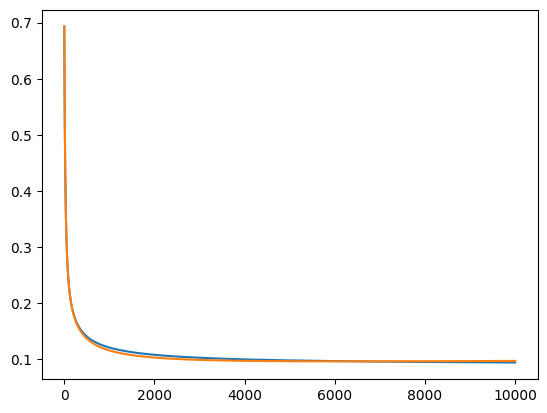

In [26]:
import matplotlib.pyplot as plt

plt.plot(loss_trace)
plt.plot(loss_test_trace)

### part 2 - Evaluate

1. Compute the accuracy of your model on the test set. Would you consider this model accurate (over 90%?)

2. State precisely what sensitivity and specificy mean then compute the sensitivity and specificty of this model.

3. Suppose its very important that we can predict if the climate simulation will crash when its actually going to crash.  Does our model do a good job of this (over 90%?) Use sensitivity or specificity to inform your answer.


In [27]:
yhat =  1.0 * (lr(x_test) > 0.5)
1 - torch.mean(torch.abs(y_test - yhat))

tensor(0.9556, dtype=torch.float64)

In [28]:
from sklearn import metrics

conf_matrix = metrics.confusion_matrix(y_test, yhat)

tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp+fn)
specificity = tn / (tn+fp)

print(sensitivity, specificity)

0.6 0.984


Sensitivity measures how effectively the model identifies actual failures

Specificity measures how well the model identifies non-failures

Our model does not do a great job because our sensitivity is low.

### part 3 - Reweight and retrain

1. Plot the confusion matrix to see if you can diagnose the issue. You may use sklearn's confusion matrix function or you can do it. Describe what the problem likely is.

2. How should we weight the loss function to account for this? and why might that help? Then modify the loss function to use inverse weight scheme described in class. Refit your model and report the test sensitivity and specificity.

We want to penalize misclassifactions of failures more.

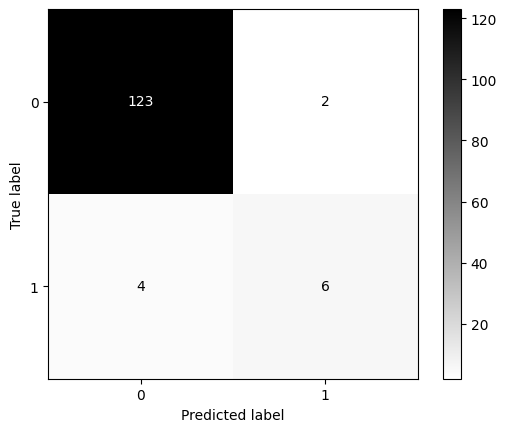

AttributeError: 'function' object has no attribute 'ravel'

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay
conf_matrix_display = ConfusionMatrixDisplay(conf_matrix)
conf_matrix_display.plot(cmap='binary')
plt.show()
tn, fp, fn, tp = confusion_matrix.ravel()
print(tn,fp,fn,tp)
print(sensitivity, specificity)

In [30]:
p1 = y_train.shape[0] / torch.sum(y_train)
p0 = y_train.shape[0] / torch.sum(1 - y_train)


w1 = p1 / (p1 + p0)
w0 = p0 / (p1 + p0)
w1, w0

(tensor(0.9111, dtype=torch.float64), tensor(0.0889, dtype=torch.float64))

In [31]:
def weighted_bce_loss(model, x, y, w1, w0):
  p = model(x)
  return -torch.mean(w1 * y*torch.log(p) + w0 * (1-y)*torch.log(1-p))


In [32]:
sensitivitiy_scores = np.zeros(25)
specificity_scores = np.zeros(25)

n_epoch = 5000
beta_trace = np.zeros(n_epoch)
alpha_trace = np.zeros(n_epoch)
loss_trace = np.zeros(n_epoch)

lr = LogisticRegression(x_train, y_train)


for i in trange(n_epoch):

  # forward pass: evaluate the function
  loss = weighted_bce_loss(lr, x_train, y_train, w1, w0)
  loss_trace[i] = loss

  # backward pass: compute derivatives
  loss.backward()

  # update parameter
  lr.weight.data = lr.weight.data - 1e-1 * lr.weight.grad
  lr.bias.data = lr.bias.data - 1e-1 * lr.bias.grad


  # clear out gradients (pytorch automatically accumulates gradients each iter)
  lr.weight.grad.zero_()
  lr.bias.grad.zero_()


  0%|          | 0/5000 [00:00<?, ?it/s]

In [33]:
p_hat = lr(x_test)

climate_y_hat_test = (p_hat > 0.5).int()
#torch.mean(1.0* (y_test.int() == climate_y_hat_test))

conf_matrix = metrics.confusion_matrix(y_test, climate_y_hat_test)

tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp+fn)
specificity = tn / (tn+fp)

print(sensitivity, specificity)

0.9 0.808


## Q4 - Multi-target Classification

Here we will implement mutli-target logistic regression, so that we can perform classification with more than two labels. We will use the digits dataset to test out our method.

Recall:

A multi-target logistic regression when we have $k$ categories is defined as
\begin{align}
y_i &\sim Categorical((p_1,...,p_k)_i) \\
(p_1,...,p_k)_i &= \sigma(x_i\beta + \alpha)
\end{align}

How to read this:
1. Take a $p$ dimensional input vector $x_i$ and multiple it by the __matrix__ $\beta_{p \times k}$ then add the vector $\alpha_{1\times k}$ to get a $k$ dimensional vector of log probabilties

2. Squash the log probabilities $z_i = x_i\beta + \alpha$ to all be between 0 and 1 and sum to 1. We do this with the __softmax function__ $\sigma(\cdot)$. The $j$'th entry $(j = 1,...,k)$ of $\sigma(z_i)$ is equal to
$$
\sigma(z_i)_j = \frac{\exp((z_i)_j)}{\sum_{j = 1}^k\exp((z_i )_j)}
$$
where $(z_i)_j$ means the  $j$'th entry of $z_i$.

3. We say $y_i$ belongs to class $j$ with probability $\sigma(z_i)_j$

Also recall:
We represent $Y_{n\times1}$ as a $Y_{n\times k}$ one-hot encoded matrix so that we can derive the __multi-target BCE loss__ function from the categorical distribution as

\begin{align}
\mathcal{L}(\beta) &= -\frac{1}{nk}\sum_{i=1}^n \sum_{j=1}^k y_{i,j} \log(\sigma(x_i \beta + \alpha))_j \\
\end{align}

In [34]:
from sklearn import datasets
digits = datasets.load_digits()

x, y = digits.data, digits.target

In [35]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

y = y.reshape(-1, 1)
y_enc = OneHotEncoder().fit_transform(y).toarray()

x_train, x_test, y_train, y_test = train_test_split(x, y_enc, test_size=0.25, random_state=0)

x_train = torch.tensor(x_train)
x_test = torch.tensor(x_test)
y_train = torch.tensor(y_train)
y_test = torch.tensor(y_test)

### part 1 - Softmax function

First lets write a pytorch compatible softmax function. This function should take a torch tensor $z = (z_1,...,z_k)$ and compute $\text{softmax}(z) = (\text{softmax}(z)_1,...,\text{softmax}(z)_k)$ where

$$
\text{softmax}(z)_j = \frac{\exp(z_j)}{\sum_{i = 1}^p \exp(z_i)} \quad j \in 1,...,k
$$

Make sure to use torch functions like `torch.exp()` and `torch.sum()` so we can apply autodiff. Do not use `torch.softmax()`.

1. Test your function by computing the softmax of the provided vector $z$
2. Plot $z$ and $\text{softmax}(z)$ side by side for comparison (use two plots)

In [36]:
# code goes here
def softmax(z):
  return torch.exp(z) / torch.sum(torch.exp(z))

Text(0.5, 1.0, 'Softmax Z')

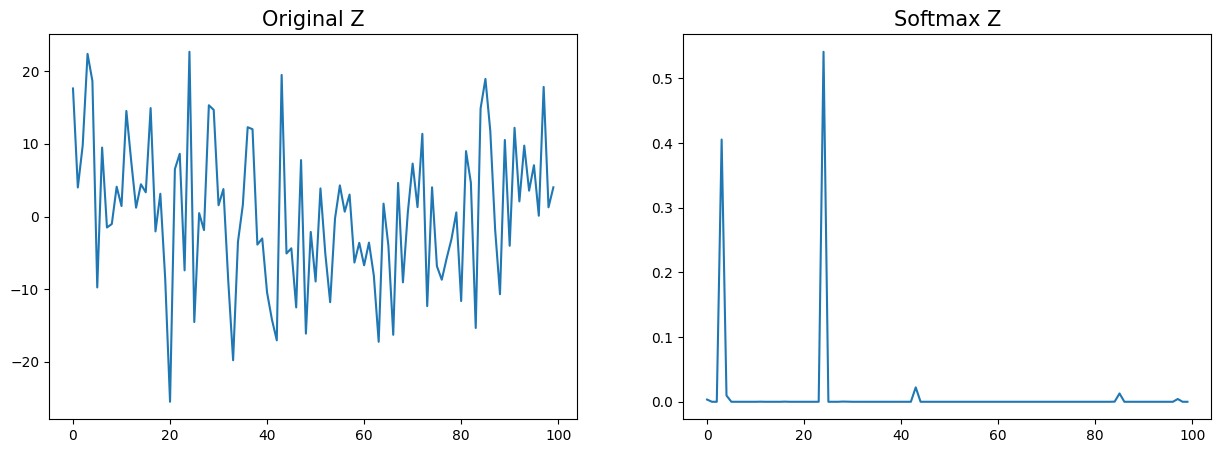

In [37]:
np.random.seed(0)
z = np.random.normal(0, 10, 100)
z = torch.tensor(z)

fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax[0].plot(z)
ax[0].set_title("Original Z", fontsize = 15)
ax[1].plot(softmax(z))
ax[1].set_title("Softmax Z", fontsize = 15)

### part 2 - Implement the model

Now lets create a class called `MultiLogisticRegression`. This class should do the following

1. Automatically determine the shapes of $\beta$ and $\alpha$ from the data `x` and `y`
2. Initialize $\alpha$ and $\beta$ and enable gradient tracking
3. Include a `forward()` function that computes class probabilities given input `x`
4. Include a `classify()` function that classifies inputs `x`, i.e. return the class with the highest probability.

Below we have provided a starter class that inherits from `nn.Module`.

To make sure its working. Instantiate your class and call the forward function on `x_train`. Print the output (it should be a tensor of all $0.1$)


In [38]:
## numerical minimization
import torch
import torch.nn as nn

class MultiLogisticRegression(nn.Module):
    def __init__(self, x, y):
      super(MultiLogisticRegression, self).__init__()
      self.beta = torch.zeros(x.shape[1], y.shape[1]).double()
      self.alpha = torch.zeros(1, y.shape[1]).double()
      self.beta.requires_grad_()
      self.alpha.requires_grad_()

    def forward(self, x):
      t = x @ self.beta + self.alpha
      return torch.softmax(t, axis = 1)

    def classify(self, x):
      p = self.forward(x)
      return torch.argmax(p, axis = 1)

In [39]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

y = y.reshape(-1, 1)
y_enc = OneHotEncoder().fit_transform(y).toarray()

x_train, x_test, y_train, y_test = train_test_split(x, y_enc, test_size=0.25, random_state=0)

x_train = torch.tensor(x_train)
x_test = torch.tensor(x_test)
y_train = torch.tensor(y_train)
y_test = torch.tensor(y_test)

In [40]:
mlr = MultiLogisticRegression(x_train, y_train)
mlr(x_train)


tensor([[0.1000, 0.1000, 0.1000,  ..., 0.1000, 0.1000, 0.1000],
        [0.1000, 0.1000, 0.1000,  ..., 0.1000, 0.1000, 0.1000],
        [0.1000, 0.1000, 0.1000,  ..., 0.1000, 0.1000, 0.1000],
        ...,
        [0.1000, 0.1000, 0.1000,  ..., 0.1000, 0.1000, 0.1000],
        [0.1000, 0.1000, 0.1000,  ..., 0.1000, 0.1000, 0.1000],
        [0.1000, 0.1000, 0.1000,  ..., 0.1000, 0.1000, 0.1000]],
       dtype=torch.float64, grad_fn=<SoftmaxBackward0>)

### Part 3 - Loss function

1. Write a function `multi_bce()` that computes the multi-target BCE loss.

2. Print the loss of your untrained model on the training dataset (should be around $0.2303$)


In [41]:
def multi_bce(model, x, y):
  p = model(x)
  return -torch.mean(y*torch.log(p))

In [42]:
mlr = MultiLogisticRegression(x_train, y_train)
multi_bce(mlr, x_train, y_train)

tensor(0.2303, dtype=torch.float64, grad_fn=<NegBackward0>)

### Part 4 - Training

1. Train a multi-target logisitc regression on the digits dataset to classify images of digits. Use the model you just constructed. Write your own gradient descent loop.

2. Plot the loss trace (did it converge?) and print the test __accuracy__. The test __accuracy__ needs to be above 0.95.

In [43]:
mlr = MultiLogisticRegression(x_train, y_train)

n_epoch = 10000
loss_trace = np.zeros(n_epoch)
for i in trange(n_epoch):
  loss = multi_bce(mlr, x_train, y_train)
  loss_trace[i] = loss
  loss.backward()

  mlr.beta.data = mlr.beta.data - 1e-3 * mlr.beta.grad
  mlr.alpha.data = mlr.alpha.data - 1e-3 * mlr.alpha.grad
  mlr.beta.grad.zero_()
  mlr.alpha.grad.zero_()

  0%|          | 0/10000 [00:00<?, ?it/s]

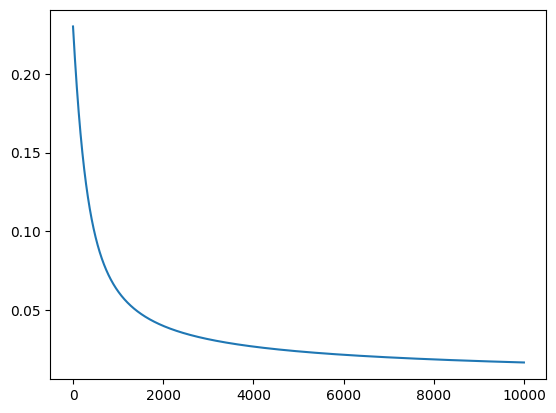

In [44]:
plt.plot(loss_trace)

In [45]:
yhat = mlr.classify(x_test).numpy()
ytest = torch.argmax(y_test, axis = 1).numpy()
np.mean(yhat == ytest)

np.float64(0.9555555555555556)